Link of the dataset: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?resource=download


Potential transformations:

-read datasets (there are total two datasets)

-concetanate the datasets as a single one

-rename the columns

-check the null values. Fill the null values with the preferred one (max, min or average).

Formulate questions to ask about the dataset:

-How about the correlations between the atmospheric variables in New Delhi?

-How does the plots of correlated variables look like?

-Is there any significant change of the values of the variables through the time?


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
#Read the datasets
df1= pd.read_csv("E:/ReDi_School/Data_Analytics/preject/1_Dataset/DailyDelhiClimateTrain.csv")
df2= pd.read_csv("E:/ReDi_School/Data_Analytics/preject/1_Dataset/DailyDelhiClimateTest.csv")

check the datasets

In [4]:
df1.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [5]:
#drop the last row of df1, as the data for this date is present in df2 as well
df1.drop(df1.index[-1], inplace=True)

In [6]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


Check the datatypes of all coulms in both the dataframe

In [207]:
df1.dtypes
df2.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

Both of these dataframes have same columns with same data types, so we can merge them together.

In [7]:
df= pd.concat([df1, df2])

In [8]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


We can check if there is any null value in the dataset

In [9]:
df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

So, there is no null values

We can check if there is any duplicated dates

In [211]:
df[df["date"].duplicated()]

,date,meantemp,humidity,wind_speed,meanpressure


So, no date is repeated

It needs to notice that the date column is in object datatype. we can can convert it to date time format and set the column as index

In [10]:
df["date"]= pd.to_datetime(df["date"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1575 non-null   datetime64[ns]
 1   meantemp      1575 non-null   float64       
 2   humidity      1575 non-null   float64       
 3   wind_speed    1575 non-null   float64       
 4   meanpressure  1575 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 73.8 KB


So, date column is converted to date_time datatype. Now we can set this column as index of the dataframe

In [12]:
df= df.set_index("date")

In [13]:
df.shape #get the shape of the dataframe

(1575, 4)

In [14]:
#Get summary of the dataframe
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1575.000000,1575.000000,1575.000000,1575.000000
mean,25.231582,60.420115,6.903642,1010.589745
std,7.337316,16.956083,4.508803,175.298310
min,6.000000,13.428571,0.000000,-3.041667
25%,18.516667,49.750000,3.700000,1001.875000
50%,27.166667,62.380952,6.370000,1009.000000
75%,31.142857,72.125000,9.262500,1015.183333
max,38.714286,98.000000,42.220000,7679.333333


In [18]:
# pressure greater than 6000 atm and less than 600 atm are unnatural. So, we can condiser those values as unnatural.
#drop unnatural pressure values
df= df.drop(df[df["meanpressure"]> 6000].index, axis=0) 
df= df.drop(df[df["meanpressure"]< 600].index, axis=0) 

In [19]:
df.shape

(1570, 4)

Now, save the dataframe for safety purpose

In [20]:
df.to_csv("E:/ReDi_School/Data_Analytics/preject/1_Dataset/ClimateData.csv")

OUR ANALYSIS

In [21]:
# defiitions for plot size and line thickness
def mm2inch(*tupl):
    inch = 25.4
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def mm2point(mm):
    return mm/(25.4/72)
font = {'family' : 'Arial',
         'weight' : 'normal',
         'size'   : 15}
mpl.rc('font', **font)
mpl.rcParams['axes.linewidth'] = mm2point(0.4)
mpl.rcParams['ytick.major.width'] = mm2point(0.4)
mpl.rcParams['xtick.major.width'] = mm2point(0.4)

We can see the correlation between variables in the dataset

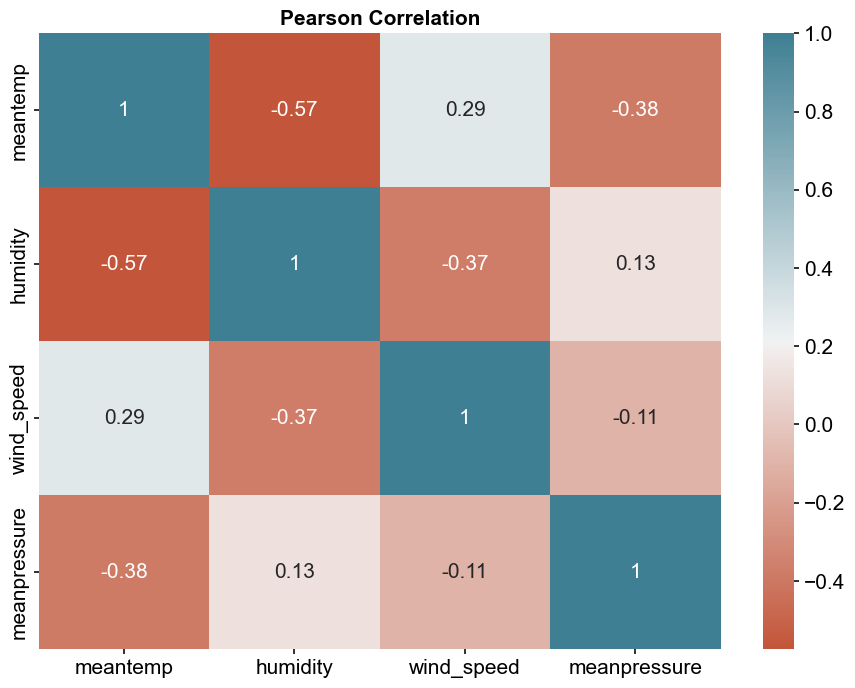

In [23]:
correlation = df.corr(numeric_only=True, method = 'pearson')
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(11,8))
sns.heatmap( correlation,cmap =palette,annot=True)
plt.title("Pearson Correlation", fontsize=15, fontweight='bold')
plt.savefig("E:/ReDi_School/Data_Analytics/preject/2_Plots/1_PearsonCorrelation.jpeg")
plt.show()

A good negative correlation exists between mean temperature and humidity.
Pearson correlation is -0.57

plot temperature vs humidity with regresssion line

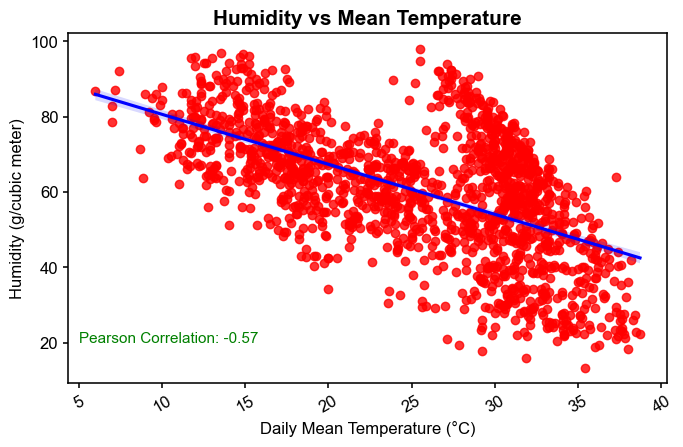

In [24]:
fig, ax1 = plt.subplots(1, figsize=(mm2inch(180.0,120.0)))
scatter_plot= sns.regplot(x = 'meantemp',
            y = 'humidity',
            data= df ,
            scatter_kws = {'color': 'red'},
            line_kws = {'color': 'blue'})
ax1.set_xlabel("Daily Mean Temperature (°C)", fontsize=12)
ax1.set_ylabel("Humidity (g/cubic meter)", fontsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Humidity vs Mean Temperature", fontsize=15, fontweight="bold")
plt.xticks(rotation=30)

# Adding text to the plot
plt.text(x=5, y=20, s='Pearson Correlation: -0.57', fontsize=11, color='green')

fig.tight_layout()
plt.savefig("E:/ReDi_School/Data_Analytics/preject/2_Plots/2_TempVsHumid.jpeg")


We can get seasonal cycle (monthly mean) of atmospheric variables 

In [25]:
df_mean_monthly= df.groupby(df.index.month).mean()
df_mean_monthly["month"]= df_mean_monthly.index #getting separate column for the months are useful for plotting
df_mean_monthly

,meantemp,humidity,wind_speed,meanpressure,month
date,,,,,
1,13.799437,78.132493,5.438174,1018.076997,1
2,17.765299,67.247746,6.736624,1015.393916,2
3,23.063520,58.195519,7.943357,1012.305959,3
4,29.606122,37.598478,8.840652,1006.573923,4
5,33.315889,35.739941,9.022982,1001.975698,5
6,33.734011,50.628724,9.381606,997.878522,6
7,30.995782,70.631436,7.418752,998.040354,7
8,30.595078,70.489505,6.864814,997.975484,8
9,30.433216,60.724564,7.596360,1007.465067,9


Now, get the time series plots of monthly mean values of atmospheric variables

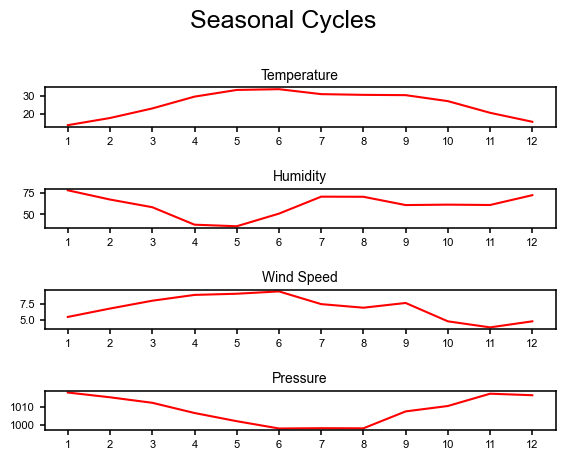

In [26]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(mm2inch(150.0,120.0)))

#plotting temperature
ax1.plot(df_mean_monthly["month"], df_mean_monthly["meantemp"], color= "red")
ax1.set_xticks(np.arange(1, 13, 1))
ax1.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.set_title("Temperature", fontsize= 10)

#plotting humidity 
ax2.plot(df_mean_monthly["month"], df_mean_monthly["humidity"], color= "red")
ax2.xaxis.set_tick_params(labelsize=8)
ax2.set_xticks(np.arange(1, 13, 1))
ax2.yaxis.set_tick_params(labelsize=8)
ax2.set_title("Humidity", fontsize= 10)

#plotting wind speed 
ax3.plot(df_mean_monthly["month"], df_mean_monthly["wind_speed"], color= "red")
ax3.xaxis.set_tick_params(labelsize=8)
ax3.set_xticks(np.arange(1, 13, 1))
ax3.yaxis.set_tick_params(labelsize=8)
ax3.set_title("Wind Speed", fontsize= 10)

#plotting wind speed 
ax4.plot(df_mean_monthly["month"], df_mean_monthly["meanpressure"], color= "red")
ax4.set_xticks(np.arange(1, 13, 1))
ax4.xaxis.set_tick_params(labelsize=8)
ax4.yaxis.set_tick_params(labelsize=8)
ax4.set_title("Pressure", fontsize= 10)

fig.suptitle("Seasonal Cycles")
fig.tight_layout()

fig.savefig("E:/ReDi_School/Data_Analytics/preject/2_Plots/3_SeasonalCycles.jpeg")

From visual observation, it seems there is a good correlation of temperature and humidity with wind speed also. So, we can check other correlations also(such as Spearman) 

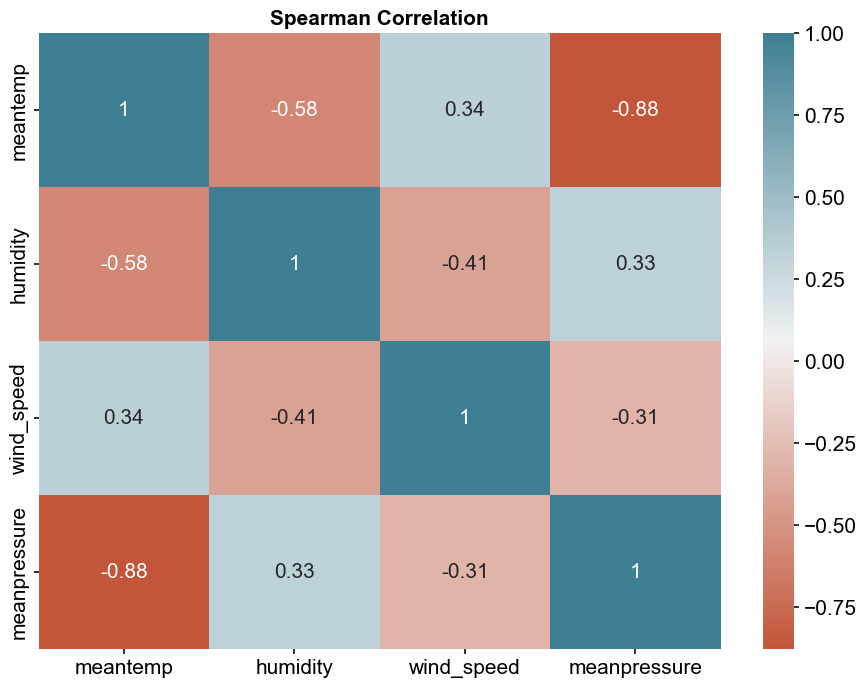

In [27]:
correlation = df.corr(numeric_only=True, method = 'spearman')
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(11,8))
sns.heatmap( correlation,cmap =palette,annot=True)
plt.title("Spearman Correlation", fontsize=15, fontweight='bold')
plt.savefig("E:/ReDi_School/Data_Analytics/preject/2_Plots/4_SpearmanCorrelation.jpeg")
plt.show()

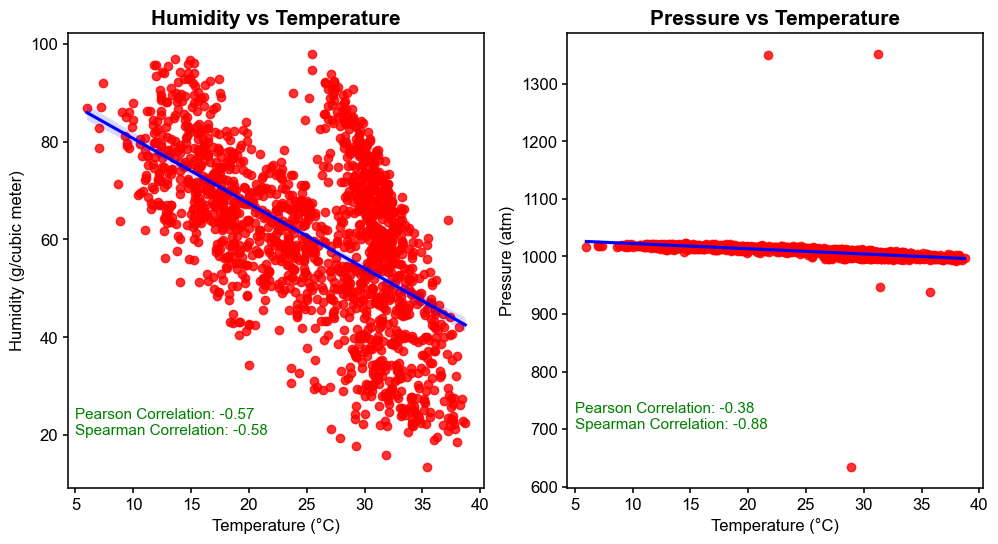

In [31]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(mm2inch(300.0,150.0)))
scatter_plot1= sns.regplot(x = 'meantemp',
            y = 'humidity',
            data= df ,
            scatter_kws = {'color': 'red'},
            line_kws = {'color': 'blue'},
            ax=ax1)
ax1.set_xlabel("Temperature (°C)", fontsize=12)
ax1.set_ylabel("Humidity (g/cubic meter)", fontsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.set_title("Humidity vs Temperature", fontsize=15, fontweight="bold")
# Adding text to the plot
ax1.text(x=5, y=20, s='Pearson Correlation: -0.57 \nSpearman Correlation: -0.58', fontsize=11, color='green')

scatter_plot2= sns.regplot(x = 'meantemp',
            y = 'meanpressure',
            data= df ,
            scatter_kws = {'color': 'red'},
            line_kws = {'color': 'blue'},
            ax=ax2)
ax2.set_xlabel("Temperature (°C)", fontsize=12)
ax2.set_ylabel("Pressure (atm)", fontsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_title("Pressure vs Temperature", fontsize=15, fontweight="bold")
ax2.text(x=5, y=700, s='Pearson Correlation: -0.38 \nSpearman Correlation: -0.88', fontsize=11, color='green')

plt.savefig("E:/ReDi_School/Data_Analytics/preject/2_Plots/6_Correlations(wol).jpeg")
plt.show()